In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!Iwget -c https://1mb.informatik.uni-freiburg.de/resources/datasets/ORION/modelnet40 manually_aligned.tar -0 - | tar -xz

/bin/bash: line 1: Iwget: command not found

gzip: stdin: unexpected end of file
tar: Child returned status 1
tar: Error is not recoverable: exiting now


In [ ]:
!git clone https://github.com/fxia22/pointnet.pytorch

#Soal1

## Soal1_2

In [4]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier



In [5]:

X, y = make_classification(n_samples=1000, n_features=3, n_informative=3, n_redundant=0, n_classes=4, shuffle =True,class_sep= 1, random_state=4)

shift_amount = np.random.randint(len(y))

X_shifted = np.roll(X, shift_amount, axis=0)
y_shifted = np.roll(y, shift_amount)

df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2', 'Feature 3'])
df['Class'] = y

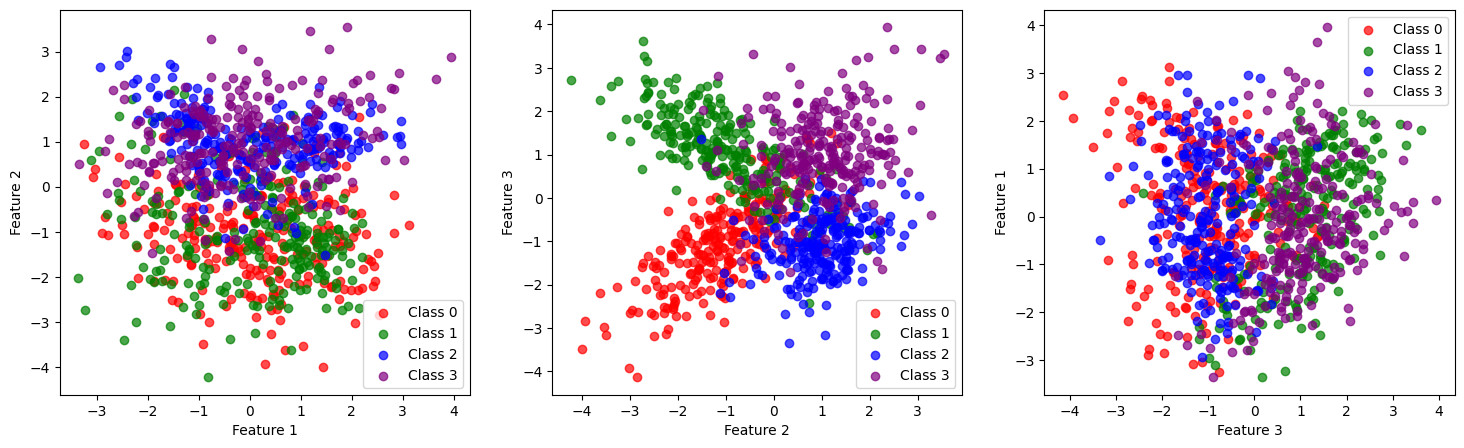

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors = ['red', 'green', 'blue', 'purple']

for i, ax in enumerate(axes):
    for class_value in np.unique(y):
        ix = np.where(y == class_value)
        ax.scatter(X[ix, i % 3], X[ix, (i + 1) % 3], label=f'Class {class_value}', alpha=0.7, color=colors[class_value])
    ax.set_xlabel(f'Feature {i % 3 + 1}')
    ax.set_ylabel(f'Feature {(i + 1) % 3 + 1}')
    ax.legend()

plt.show()


##Soal1_3

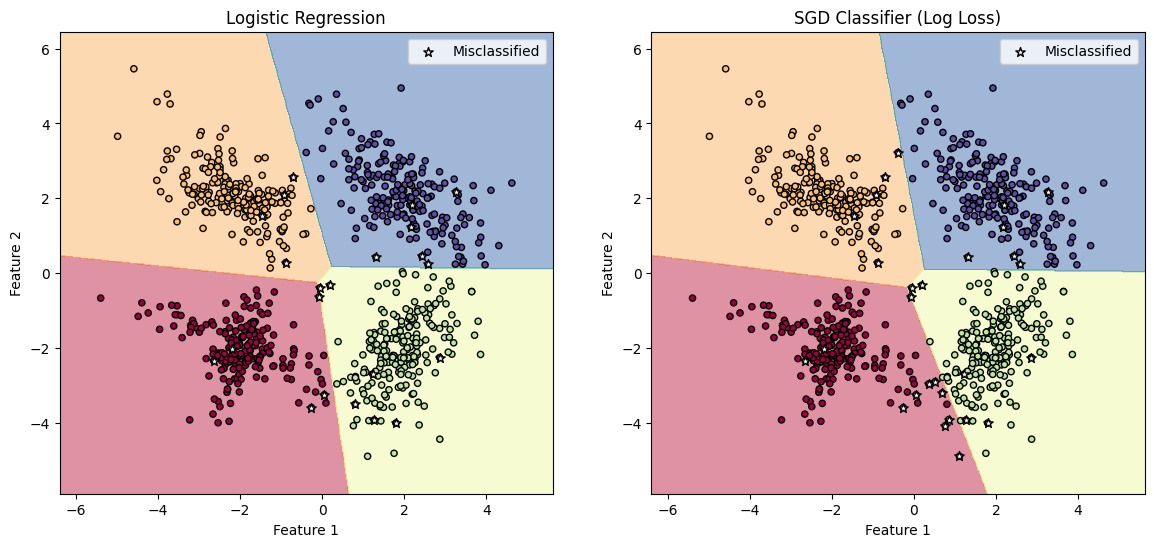

In [7]:
X, y = make_classification(n_samples=1000, n_features=3, n_informative=3, n_redundant=0, n_classes=4, shuffle =True,class_sep= 2, random_state=42)

shift_amount = np.random.randint(len(y))

# Shuffle the data using shift
X_shifted = np.roll(X, shift_amount, axis=0)
y_shifted = np.roll(y, shift_amount)

df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2', 'Feature 3'])
df['Class'] = y
def plot_decision_boundaries(X, y, model, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s=20, edgecolor='k')

    predictions = model.predict(X)
    misclassified = np.where(predictions != y)
    plt.scatter(X[misclassified, 0], X[misclassified, 1], c="white", s=50, label="Misclassified", edgecolor='k', marker='*')

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

log_reg_2d = LogisticRegression(max_iter=1000, C=1.0, solver='lbfgs', random_state=42)
log_reg_2d.fit(X_train_2d, y_train)

sgd_clf_2d = SGDClassifier(max_iter=1000, loss='log_loss', alpha=0.0001, learning_rate='optimal', random_state=42)
sgd_clf_2d.fit(X_train_2d, y_train)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_decision_boundaries(X_train_2d, y_train, log_reg_2d, "Logistic Regression")

plt.subplot(1, 2, 2)
plot_decision_boundaries(X_train_2d, y_train, sgd_clf_2d, "SGD Classifier (Log Loss)")

plt.show()

## Soal1_4

In [8]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix, classification_report
X, y = make_classification(n_samples=1000, n_features=3, n_informative=3, n_redundant=0, n_classes=4, shuffle =True,class_sep= 1, random_state=42)

shift_amount = np.random.randint(len(y))

# Shuffle the data using shift
X_shifted = np.roll(X, shift_amount, axis=0)
y_shifted = np.roll(y, shift_amount)


def plot_decision_boundaries(X, y, model, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s=20, edgecolor='k')

    predictions = model.predict(X)
    misclassified = np.where(predictions != y)
    plt.scatter(X[misclassified, 0], X[misclassified, 1], c="white", s=50, label="Misclassified", edgecolor='k', marker='*')

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)




log_reg_2d = LogisticRegression(max_iter=100,
                                C=0.05,
                                solver='liblinear',
                                penalty='l2',
                                tol=1e-4,
                                fit_intercept=True,
                                warm_start=True,
                                multi_class='auto',
                                random_state=4)
log_reg_2d.fit(X_train, y_train)





y_pred = log_reg_2d.predict(X_train)


sgd_clf_2d = SGDClassifier(max_iter=1000, loss='log_loss', alpha=0.01, learning_rate='optimal', random_state=4)
sgd_clf_2d.fit(X_train, y_train)






SGDClassifier(alpha=0.01, loss='log_loss', random_state=4)

In [9]:
from sklearn.metrics import accuracy_score, classification_report

log_reg_predictions = log_reg_2d.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)

# Assuming sgd_clf_2d is your trained SGDClassifier model
sgd_clf_predictions = sgd_clf_2d.predict(X_test)
sgd_clf_accuracy = accuracy_score(y_test, sgd_clf_predictions)

print(f"Logistic Regression accuracy: {log_reg_accuracy}")
print(f"SGD Classifier accuracy: {sgd_clf_accuracy}")

classification_rep_logreg = classification_report(y_test, log_reg_predictions)
print(classification_rep_logreg)


Logistic Regression accuracy: 0.8
SGD Classifier accuracy: 0.805
              precision    recall  f1-score   support

           0       0.94      0.78      0.85        63
           1       0.82      0.83      0.83        54
           2       0.76      0.84      0.80        45
           3       0.65      0.74      0.69        38

    accuracy                           0.80       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.81      0.80      0.80       200



In [12]:
!pip install drawdata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.6/118.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.8/246.8 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.6/730.6 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.2/383.2 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

## Soal1_5

In [1]:
from drawdata import ScatterWidget

widget = ScatterWidget()
widget

ScatterWidget()

In [2]:
df = widget.data_as_pandas
df

x           y    color label
0     561.503598  359.114080  #1f77b4     a
1     561.233809  359.398104  #1f77b4     a
2     557.906001  358.163746  #1f77b4     a
3     559.603029  356.765319  #1f77b4     a
4     562.365046  356.090901  #1f77b4     a
...          ...         ...      ...   ...
1148  335.585741  134.387736  #2ca02c     c
1149  340.400829  142.217255  #2ca02c     c
1150  341.257354  144.526875  #2ca02c     c
1151  337.897043  148.689094  #2ca02c     c
1152  343.350014  146.053093  #2ca02c     c

[1153 rows x 4 columns]

In [3]:
df.describe()

x            y
count  1153.000000  1153.000000
mean    378.740525   264.307849
std     168.905672   122.802458
min      49.072829     5.175955
25%     225.408452   138.068739
50%     377.931936   303.912815
75%     530.611035   356.592907
max     670.713319   518.116335

In [4]:
df.drop(columns = ['color'], inplace = True)

In [5]:
df

x           y label
0     561.503598  359.114080     a
1     561.233809  359.398104     a
2     557.906001  358.163746     a
3     559.603029  356.765319     a
4     562.365046  356.090901     a
...          ...         ...   ...
1148  335.585741  134.387736     c
1149  340.400829  142.217255     c
1150  341.257354  144.526875     c
1151  337.897043  148.689094     c
1152  343.350014  146.053093     c

[1153 rows x 3 columns]

In [6]:
shuffled_df = df.sample(frac = 1).reset_index(drop = True)
shuffled_df

x           y label
0     577.712287  323.021705     a
1     159.561698  429.481390     b
2     591.140171  294.260872     a
3     527.284397   90.646826     c
4     590.448628  328.851888     a
...          ...         ...   ...
1148  556.502130  342.618262     a
1149  395.270256   95.288657     c
1150  589.637440  310.020937     a
1151  178.107812  313.676177     b
1152  515.336396  385.429712     a

[1153 rows x 3 columns]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [8]:
X = shuffled_df[["x", "y"]]
y = shuffled_df['label']
X.shape, y.shape

((1153, 2), (1153,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 54, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((922, 2), (231, 2), (922,), (231,))

In [10]:
model1 = LogisticRegression(solver = 'sag',max_iter = 400,  random_state = 54)
model1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=400, random_state=54, solver='sag')

In [11]:
y_pred = model1.predict(X_test)

In [12]:
accuracy_logreg = accuracy_score(y_test,y_pred)
print(f"for logestic regression the accuracy is {accuracy_logreg*100:.2f}%")

for logestic regression the accuracy is 88.74%


<Axes: >

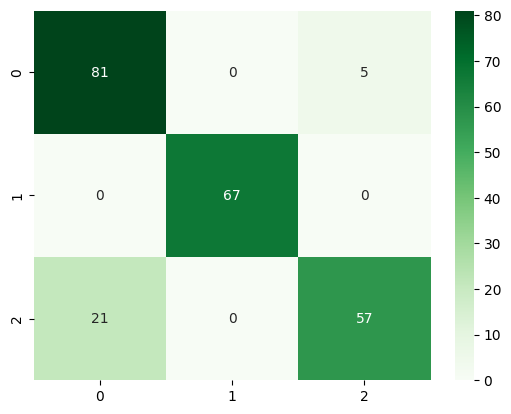

In [13]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Greens')


In [14]:
classification_rep = classification_report(y_test,y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           a       0.79      0.94      0.86        86
           b       1.00      1.00      1.00        67
           c       0.92      0.73      0.81        78

    accuracy                           0.89       231
   macro avg       0.90      0.89      0.89       231
weighted avg       0.90      0.89      0.89       231



In [15]:
model2 = SGDClassifier(loss = 'log', random_state = 54)
model2.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log', random_state=54)

In [16]:
y_pred= model2.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test,y_pred)
print(f"for stochastic gradient decent classifier the accurecy is {accuracy*100:.2f}%")

for stochastic gradient decent classifier the accurecy is 76.19%


In [18]:
classification_rep = classification_report(y_test,y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           a       0.61      1.00      0.76        86
           b       1.00      0.94      0.97        67
           c       1.00      0.35      0.51        78

    accuracy                           0.76       231
   macro avg       0.87      0.76      0.75       231
weighted avg       0.85      0.76      0.74       231



<Axes: >

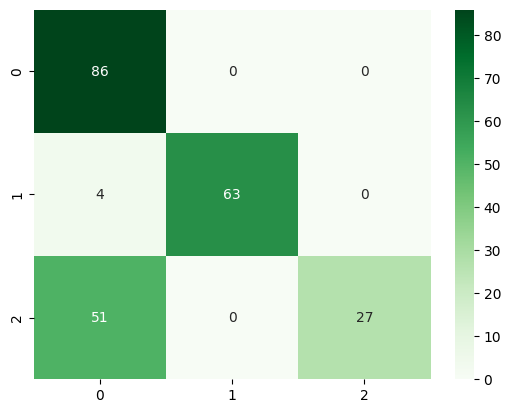

In [19]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Greens')


In [20]:
from sklearn.linear_model import Perceptron

model = Perceptron(penalty='l2', alpha=0.0001, max_iter=1000, tol=1e-3, random_state=54)

model.fit(X_train, y_train)
y_pred= model2.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"for Perceptron classifier the accurecy is {accuracy*100:.2f}%")


for Perceptron classifier the accurecy is 76.19%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


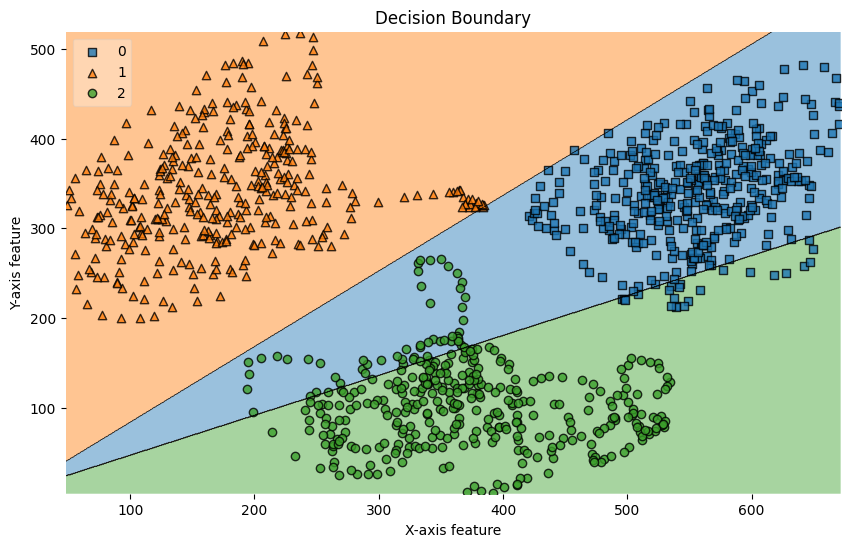

In [21]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import numpy as np
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()


y_encoded = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state=54, test_size=0.2)


model1 = LogisticRegression(solver='sag', max_iter=400, random_state=54)
model1.fit(X_train, y_train)


plt.figure(figsize=(10, 6))
plot_decision_regions(X.values, y_encoded, clf=model1, legend=2)


plt.xlabel('X-axis feature')
plt.ylabel('Y-axis feature')
plt.title('Decision Boundary')
plt.show()



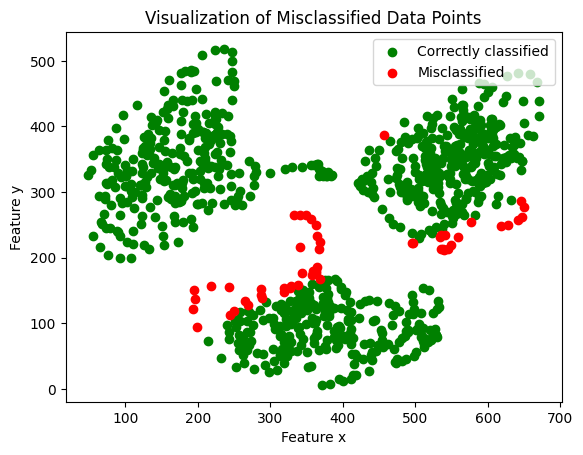

In [22]:
import matplotlib.pyplot as plt


y_train_pred = model1.predict(X_train)


misclassified = y_train != y_train_pred

plt.scatter(X_train[~misclassified]['x'], X_train[~misclassified]['y'], color='green', label='Correctly classified')


plt.scatter(X_train[misclassified]['x'], X_train[misclassified]['y'], color='red', label='Misclassified')


plt.title('Visualization of Misclassified Data Points')
plt.xlabel('Feature x')
plt.ylabel('Feature y')
plt.legend()

plt.show()


# Soal2


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

normal_bearings_data = pd.read_csv('/content/drive/MyDrive/HW1/normal_0_1.csv')
faulty_bearings_data = pd.read_csv('/content/drive/MyDrive/HW1/IR0072_1.csv')

# Function to select M samples of length N from the dataset
def select_samples(data, M, N, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    samples = []
    for _ in range(M):
        start_index = np.random.randint(0, len(data) - N)
        sample = data[start_index:start_index + N]
        samples.append(sample)
    return np.array(samples)

M = 350
N = 450
normal_samples = select_samples(normal_bearings_data, M, N, 64)
faulty_samples = select_samples(faulty_bearings_data, M, N, 64)

labels_normal = np.zeros(M)
labels_faulty = np.ones(M)

normal_samples_flat = normal_samples.reshape(M, -1)
faulty_samples_flat = faulty_samples.reshape(M, -1)

data_combined = np.vstack((normal_samples_flat, faulty_samples_flat))

labels_combined = np.concatenate((labels_normal, labels_faulty))

df = pd.DataFrame(data_combined)
df['label'] = labels_combined

df


0         1         2         3         4         5         6  \
0   -0.184830 -0.159590 -0.107440 -0.046313  0.031084  0.071972  0.105350   
1    0.165850  0.162930  0.141650  0.101600  0.061124  0.066131  0.065922   
2    0.076979  0.113490  0.126420  0.098466  0.053614  0.018775  0.006676   
3    0.079691  0.087618  0.060707  0.011474 -0.012100  0.010014  0.026911   
4    0.015855  0.034422  0.058412  0.049859  0.042975  0.067591  0.098884   
..        ...       ...       ...       ...       ...       ...       ...   
695  0.044020  0.119020  0.048808 -0.064782  0.004466  0.013319  0.009536   
696  0.028448  0.019032  0.003420 -0.037783 -0.095604 -0.091057 -0.016940   
697 -0.149400 -0.072065  0.023660  0.017584  0.053073  0.049774  0.002374   
698  0.028609 -0.111940 -0.086873 -0.080837 -0.055085  0.046032  0.033115   
699 -0.049532  0.003823  0.101720  0.174230  0.057298 -0.030540 -0.090252   

            7         8         9  ...       441       442       443  \
0    0.100340  0.077188  0.027954  ...  0.023156  0.067591  0.120790   
1    0.067800  0.048399  0.033587  ...  0.071346  0.067174  0.074893   
2    0.016272  0.008345  0.002921  ...  0.084281  0.076145  0.045270   
3    0.035673  0.025034  0.003755  ...  0.127050  0.048190 -0.034630   
4    0.125800  0.103060  0.056743  ...  0.012934  0.011265  0.015020   
..        ...       ...       ...  ...       ...       ...       ...   
695  0.080917  0.071824  0.078946  ... -0.039392 -0.047762 -0.010341   
696  0.027442  0.044060  0.012272  ... -0.104540 -0.074158  0.050941   
697 -0.020038 -0.054160 -0.062529  ...  0.168190  0.110610  0.052470   
698  0.033558  0.066754 -0.021004  ...  0.107070  0.140910  0.136160   
699 -0.168630 -0.095363  0.000402  ... -0.101800 -0.135640 -0.050377   

          444       445       446       447       448       449  label  
0    0.150410  0.189840  0.207780  0.194640  0.161260  0.086575    0.0  
1    0.083863  0.090956  0.088036  0.053406 -0.007719 -0.064462    0.0  
2    0.015020  0.014394  0.014186  0.043601  0.051528  0.027329    0.0  
3   -0.075727 -0.055909 -0.019193  0.026911  0.062376  0.087827    0.0  
4    0.030041  0.073015  0.119330  0.143530  0.117450  0.059247    0.0  
..        ...       ...       ...       ...       ...       ...    ...  
695 -0.009496 -0.032954 -0.072950 -0.110130 -0.050055  0.048486    1.0  
696  0.003420 -0.016256  0.062770 -0.004627 -0.033840  0.003501    1.0  
697 -0.101680 -0.196440 -0.076773 -0.002696  0.016980  0.056091    1.0  
698  0.013520 -0.082406 -0.088965 -0.084136  0.005191  0.058706    1.0  
699 -0.053516  0.018670  0.054803 -0.001207  0.087597  0.051705    1.0  

[700 rows x 451 columns]

In [25]:
def standard_deviation(x):
    return np.sqrt(np.sum((x - np.mean(x))**2) / len(x))

def peak(x):
    return np.max(np.abs(x))

def skewness(x):
    return np.sum((x - np.mean(x))**3) / (len(x) * standard_deviation(x)**3)

def kurtosis(x):
    return np.sum((x - np.mean(x))**4) / (len(x) * standard_deviation(x)**4)

def crest_factor(x):
    return peak(x) / np.sqrt(np.mean(x**2))

def clearance_factor(x):
    return peak(x) / np.mean(np.sqrt(np.abs(x)))

def peak_to_peak(x):
    return np.max(x) - np.min(x)

def shape_factor(x):
    return np.sqrt(np.mean(x**2)) / np.mean(np.abs(x))

def impact_factor(x):
    return peak(x) / np.mean(np.abs(x))

def square_mean_root(x):
    return np.sqrt(np.mean(np.sqrt(np.abs(x))))

def mean(x):
    return np.mean(x)

def absolute_mean(x):
    return np.mean(np.abs(x))

def root_mean_square(x):
    return np.sqrt(np.mean(x**2))

def impulse_factor(x):
    return peak(x) / root_mean_square(x)

feature_functions = {
    'Standard Deviation': standard_deviation,
    'Peak': peak,
    'Skewness': skewness,
    'Kurtosis': kurtosis,
    'Crest Factor': crest_factor,
    'Clearance Factor': clearance_factor,
    'Peak to Peak': peak_to_peak,
    'Shape Factor': shape_factor,
    'Impact Factor': impact_factor,
    'Square Mean Root': square_mean_root,
    'Mean': mean,
    'Absolute Mean': absolute_mean,
    'Root Mean Square': root_mean_square,
    'Impulse Factor': impulse_factor,
}


In [26]:
data_features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

extracted_features_df = pd.DataFrame()

for name, func in feature_functions.items():
    extracted_features_df[name] = data_features.apply(func, axis=1)

extracted_features_df['label'] = labels

In [27]:
extracted_features_df

Standard Deviation     Peak  Skewness  Kurtosis  Crest Factor  \
0              0.080989  0.22510  0.042109  2.535674      2.729764   
1              0.068411  0.19881 -0.145628  2.862061      2.851764   
2              0.063535  0.17252 -0.278597  2.982799      2.621507   
3              0.072519  0.24387 -0.003975  3.302964      3.297854   
4              0.068937  0.17878 -0.132950  2.604215      2.526340   
..                  ...      ...       ...       ...           ...   
695            0.083511  0.28565  0.070906  3.523449      3.411451   
696            0.088273  0.27434  0.156517  2.989424      3.100956   
697            0.089931  0.25156 -0.064847  2.826490      2.791782   
698            0.085046  0.28058  0.103196  2.953445      3.291568   
699            0.095440  0.30363  0.126471  3.254654      3.172765   

     Clearance Factor  Peak to Peak  Shape Factor  Impact Factor  \
0            0.933913       0.40993      1.221203       3.333597   
1            0.911215       0.38072      1.247142       3.556555   
2            0.821560       0.33837      1.255171       3.290440   
3            1.094496       0.47606      1.263029       4.165287   
4            0.809468       0.34442      1.235642       3.121651   
..                ...           ...           ...            ...   
695          1.229984       0.55765      1.289890       4.400396   
696          1.110306       0.53967      1.241352       3.849377   
697          1.011367       0.48836      1.243789       3.472389   
698          1.153672       0.53432      1.238292       4.075922   
699          1.209982       0.60356      1.275164       4.045795   

     Square Mean Root      Mean  Absolute Mean  Root Mean Square  \
0            0.490947  0.015512       0.067525          0.082461   
1            0.467099  0.013417       0.055900          0.069715   
2            0.458248  0.017151       0.052431          0.065809   
3            0.472033  0.014469       0.058548          0.073948   
4            0.469959  0.015987       0.057271          0.070766   
..                ...       ...            ...               ...   
695          0.481912  0.006083       0.064915          0.083733   
696          0.497076  0.005898       0.071269          0.088469   
697          0.498731  0.005629       0.072446          0.090107   
698          0.493159  0.005779       0.068838          0.085242   
699          0.500937  0.007028       0.075048          0.095699   

     Impulse Factor  label  
0          2.729764    0.0  
1          2.851764    0.0  
2          2.621507    0.0  
3          3.297854    0.0  
4          2.526340    0.0  
..              ...    ...  
695        3.411451    1.0  
696        3.100956    1.0  
697        2.791782    1.0  
698        3.291568    1.0  
699        3.172765    1.0  

[700 rows x 15 columns]

In [28]:
from sklearn.model_selection import train_test_split
y = extracted_features_df['label']
X = extracted_features_df.drop('label',axis=1)
X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state=64,test_size=0.25, shuffle=True)

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_normalized_data = scaler.fit_transform(X_train)
test_normalized_data = scaler.fit_transform(X_test)

In [30]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [31]:
def logistic_regression(x, w):
    y_hat = sigmoid(x @ w)
    return y_hat

In [32]:
y_hat = logistic_regression(train_normalized_data, np.random.randn(14, 1))

In [33]:
def bce(y, y_hat):
    loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
    return loss

In [34]:
y_train = y_train.values.reshape(-1, 1)

In [35]:
def gradient(x, y, y_hat):
    grads = (x.T @ (y_hat - y)) / len(y)
    return grads

In [36]:
def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w

In [37]:
def accuracy(y, y_hat):
    acc = np.sum(y == np.round(y_hat)) / len(y)
    return acc

In [38]:
train_normalized_data.shape


(525, 14)

In [39]:
m = 13
w = np.random.randn(m+1, 1)
print(w.shape)

eta = 0.001
n_epochs = 2000

(14, 1)


In [40]:
error_hist = []

for epoch in range(n_epochs):
    # predictions
    y_hat = logistic_regression(train_normalized_data, w)

    # loss
    e = bce(y_train, y_hat)
    error_hist.append(e)

    # gradients
    grads = gradient(train_normalized_data, y_train, y_hat)

    # gradient descent
    w = gradient_descent(w, eta, grads)

    if (epoch+1) % 1 == 0:
        print(f'Epoch={epoch}, \t E={e:.4},\t w={w.T[0]}')

Streaming output truncated to the last 5000 lines.
  0.9419149  -0.62757358  0.65575937  0.57725154 -0.28532095 -0.71398442
 -0.97402272 -0.12209399]
Epoch=334, 	 E=0.5931,	 w=[-0.38123629  2.0143048  -0.15199679 -1.17224264  0.01996468 -0.25745969
  0.94224834 -0.62728865  0.6559211   0.57756554 -0.28564155 -0.71364684
 -0.97366211 -0.12195905]
Epoch=335, 	 E=0.592,	 w=[-0.38087414  2.01459998 -0.15182338 -1.17198738  0.02009921 -0.25720185
  0.94258121 -0.62700415  0.6560824   0.57787908 -0.28596166 -0.71330976
 -0.97330204 -0.12182452]
Epoch=336, 	 E=0.591,	 w=[-0.38051253  2.01489461 -0.15165025 -1.17173256  0.02023335 -0.25694453
  0.94291352 -0.62672009  0.65624329  0.57819213 -0.2862813  -0.7129732
 -0.97294252 -0.12169038]
Epoch=337, 	 E=0.5899,	 w=[-0.38015146  2.01518869 -0.15147742 -1.17147819  0.02036709 -0.25668774
  0.94324526 -0.62643646  0.65640375  0.57850472 -0.28660047 -0.71263714
 -0.97258353 -0.12155664]
Epoch=338, 	 E=0.5888,	 w=[-0.37979094  2.01548222 -0.1513048

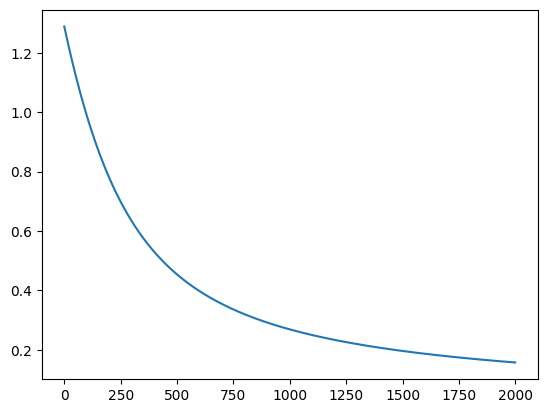

In [41]:
plt.plot(error_hist)

In [42]:
y_test = y_test.to_numpy().reshape(-1, 1)
y_hat = logistic_regression(test_normalized_data, w)
accuracy(y_test, y_hat)

0.9771428571428571

In [43]:
error_hist1 = []

for epoch in range(n_epochs):
    # predictions
    y_hat = logistic_regression(test_normalized_data, w)

    # loss
    e = bce(y_test, y_hat)
    error_hist1.append(e)

    # gradients
    grads = gradient(test_normalized_data, y_test, y_hat)

    # gradient descent
    w = gradient_descent(w, eta, grads)

    if (epoch+1) % 1 == 0:
        print(f'Epoch={epoch}, \t E={e:.4},\t w={w.T[0]}')

Streaming output truncated to the last 5000 lines.
 -0.65139393 -0.08005663]
Epoch=393, 	 E=0.127,	 w=[-0.05701482  2.23504931 -0.0037018  -0.98170267  0.06186455 -0.08267636
  1.21248801 -0.38458376  0.7274925   0.85951776 -0.58082749 -0.41006993
 -0.65131484 -0.08005918]
Epoch=394, 	 E=0.127,	 w=[-0.05693535  2.23509555 -0.00365742 -0.98166567  0.06186199 -0.08264339
  1.21255015 -0.3845271   0.72749811  0.85958807 -0.58089994 -0.4099946
 -0.65123577 -0.08006175]
Epoch=395, 	 E=0.1269,	 w=[-0.05685592  2.23514176 -0.00361306 -0.9816287   0.06185942 -0.08261044
  1.21261225 -0.38447046  0.72750371  0.85965834 -0.58097235 -0.4099193
 -0.65115674 -0.08006432]
Epoch=396, 	 E=0.1269,	 w=[-0.05677652  2.23518795 -0.0035687  -0.98159175  0.06185684 -0.08257751
  1.21267433 -0.38441385  0.72750929  0.85972859 -0.58104474 -0.40984403
 -0.65107775 -0.0800669 ]
Epoch=397, 	 E=0.1269,	 w=[-0.05669715  2.23523411 -0.00352436 -0.98155483  0.06185425 -0.0825446
  1.21273638 -0.38435727  0.72751487 

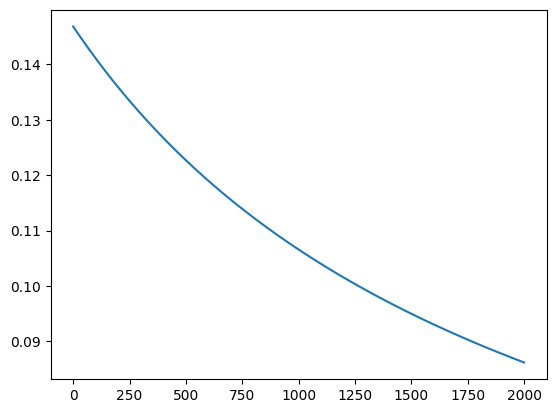

In [44]:
plt.plot(error_hist1)

In [45]:
y_hat, y_test

(array([[1.33094311e-02],
        [9.75955903e-01],
        [9.30866274e-03],
        [1.32486370e-03],
        [9.92364794e-01],
        [1.08078247e-01],
        [9.98652002e-01],
        [9.98843447e-03],
        [1.04174578e-01],
        [2.25527092e-02],
        [9.79196047e-01],
        [3.32650787e-01],
        [9.54246600e-01],
        [2.47620372e-02],
        [9.82699728e-01],
        [1.79217951e-02],
        [2.00286080e-02],
        [1.00512772e-01],
        [9.39111904e-01],
        [3.63413819e-03],
        [2.02756379e-02],
        [4.94028363e-02],
        [9.97611272e-01],
        [1.25372515e-01],
        [7.54193423e-01],
        [2.29360038e-01],
        [1.48369834e-02],
        [1.18560340e-01],
        [1.02115167e-01],
        [9.80170975e-01],
        [7.15901346e-02],
        [9.99598275e-01],
        [3.19028740e-03],
        [9.57158836e-01],
        [9.91841135e-01],
        [9.74708032e-01],
        [1.41139594e-01],
        [9.95561697e-01],
        [2.4

In [46]:
# Calculate accuracy
def accuracy(y_true, y_pred):
    y_pred = np.round(y_pred)
    correct = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
    total = len(y_true)
    return correct / total

# Calculate precision
def precision(y_true, y_pred):
    y_pred = np.round(y_pred)
    true_positive = sum(1 for true, pred in zip(y_true, y_pred) if true == pred == 1)
    false_positive = sum(1 for true, pred in zip(y_true, y_pred) if true != pred == 1)
    return true_positive / (true_positive + false_positive) if (true_positive + false_positive) != 0 else 0

# Calculate recall
def recall(y_true, y_pred):
    y_pred = np.round(y_pred)
    true_positive = sum(1 for true, pred in zip(y_true, y_pred) if true == pred == 1)
    false_negative = sum(1 for true, pred in zip(y_true, y_pred) if true == 1 and pred == 0)
    return true_positive / (true_positive + false_negative) if (true_positive + false_negative) != 0 else 0

# Calculate F1 score
def f1_score(y_true, y_pred):
    y_pred = np.round(y_pred)
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * (prec * rec) / (prec + rec) if (prec + rec) != 0 else 0


acc = accuracy(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
pre = precision(y_test, y_hat)
rec = recall(y_test, y_hat)

print("Accuracy:", acc)
print("F1 Score:", f1)
print("Precision:", pre)
print("Recall:", rec)


Accuracy: 0.9828571428571429
F1 Score: 0.983050847457627
Precision: 0.9775280898876404
Recall: 0.9886363636363636


In [47]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [48]:
model1 = LogisticRegression(solver='sag', max_iter=200, random_state=64)
model1.fit(train_normalized_data, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=200, random_state=64, solver='sag')

In [49]:
model1.score(train_normalized_data, y_train)

1.0

In [50]:
model1.score(test_normalized_data, y_test)

0.9942857142857143

In [51]:
model2 = SGDClassifier(loss='log_loss', random_state=64)
model2.fit(train_normalized_data, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(loss='log_loss', random_state=64)

In [52]:
model2.score(train_normalized_data, y_train)

1.0

In [53]:
model2.score(test_normalized_data, y_test)

0.9942857142857143

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
yhat1 = model1.predict(test_normalized_data)
yhat2 = model2.predict(test_normalized_data)
model1_report = classification_report(y_test,yhat1)
model2_report = classification_report(y_test,yhat2)
print(model1_report)
print(model2_report)

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        87
         1.0       0.99      1.00      0.99        88

    accuracy                           0.99       175
   macro avg       0.99      0.99      0.99       175
weighted avg       0.99      0.99      0.99       175

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        87
         1.0       0.99      1.00      0.99        88

    accuracy                           0.99       175
   macro avg       0.99      0.99      0.99       175
weighted avg       0.99      0.99      0.99       175



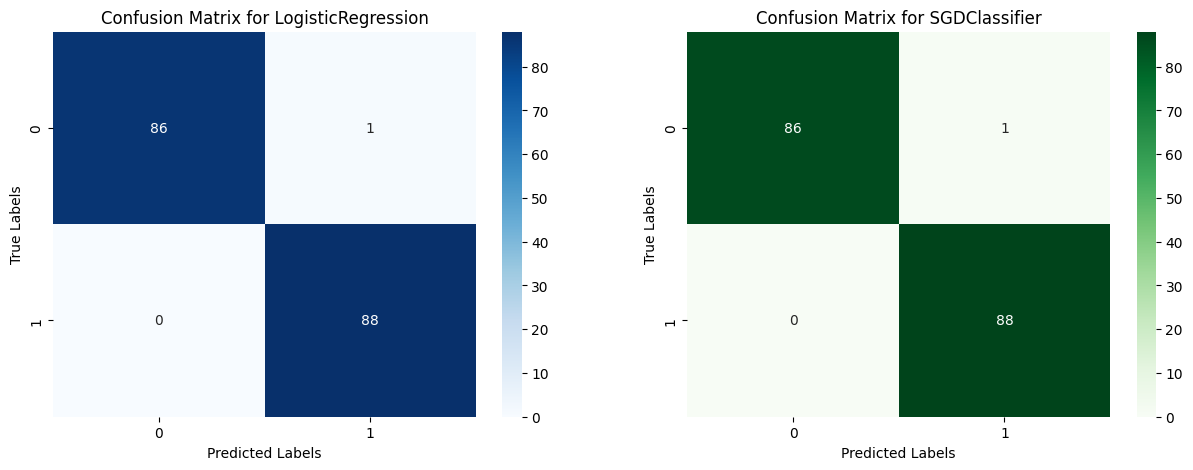

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns


cm1 = confusion_matrix(y_test, yhat1)
cm2 = confusion_matrix(y_test, yhat2)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(cm1, ax=ax[0], annot=True, fmt='d', cmap='Blues')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')
ax[0].set_title('Confusion Matrix for LogisticRegression')

sns.heatmap(cm2, ax=ax[1], annot=True, fmt='d', cmap='Greens')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')
ax[1].set_title('Confusion Matrix for SGDClassifier')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

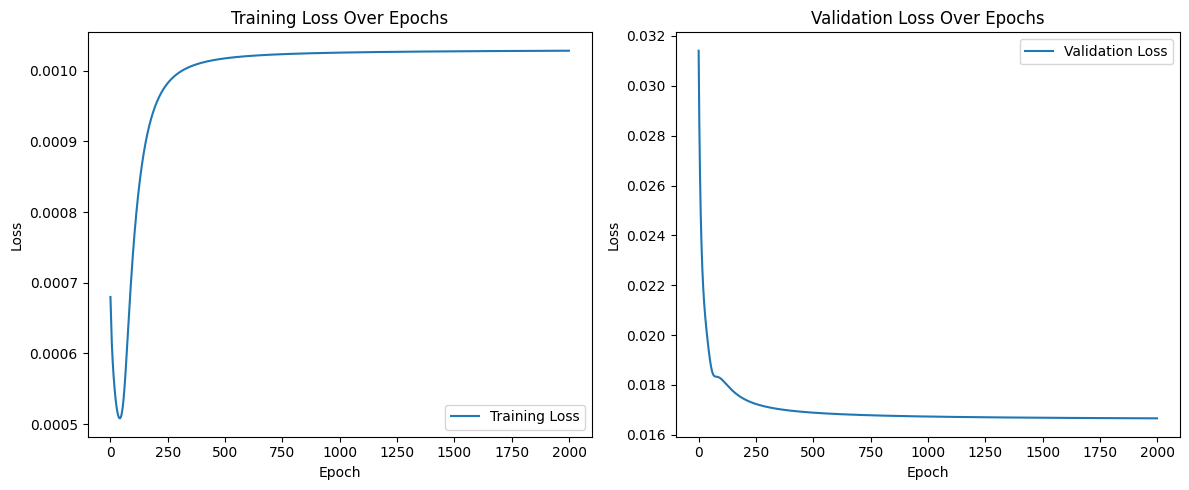

In [58]:
from sklearn.metrics import log_loss

train_losses = []
test_losses = []

# Training loop
n_epochs = 2000
for epoch in range(n_epochs):
    # Train the model
    model2.partial_fit(train_normalized_data, y_train, classes=np.unique(y_train))

    # Compute training and validation loss
    train_loss = log_loss(y_train, model2.predict_proba(train_normalized_data))
    test_loss = log_loss(y_test, model2.predict_proba(test_normalized_data))

    # Record the loss values
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Plot the training loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot the validation loss values
plt.subplot(1, 2, 2)
plt.plot(test_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

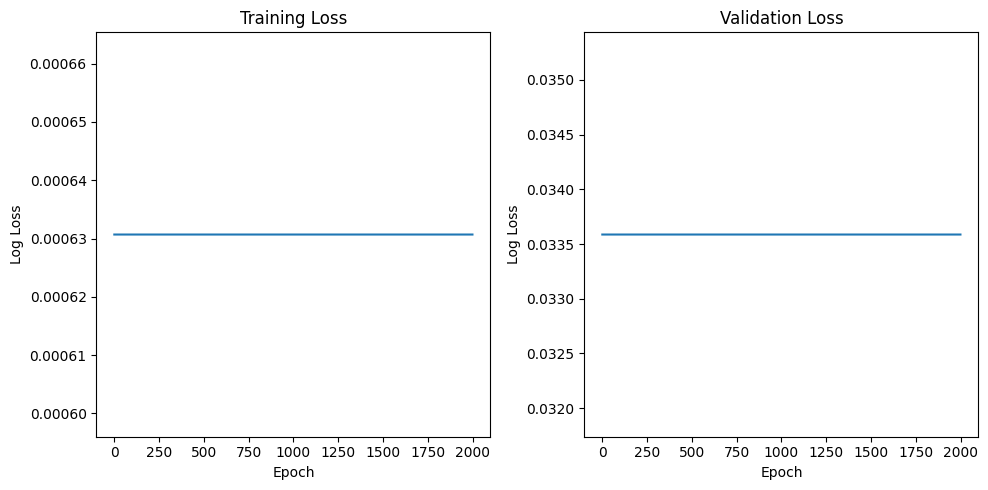

In [59]:
train_losses = []
test_losses = []

n_epochs = 2000
for epoch in range(n_epochs):

    model2.fit(train_normalized_data, y_train)

    train_loss = log_loss(y_train, model2.predict_proba(train_normalized_data))
    test_loss = log_loss(y_test, model2.predict_proba(test_normalized_data))

    train_losses.append(train_loss)
    test_losses.append(test_loss)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(n_epochs), train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')

plt.subplot(1, 2, 2)
plt.plot(range(n_epochs), test_losses, label='Validation Loss')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')

plt.tight_layout()
plt.show()

#Soal3


##Soal1_1

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/HW1/weatherHistory.csv')

data.head()


Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   
3                   269.0          15.8263         0.0               1016.41   
4                   259.0          15.8263         0.0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

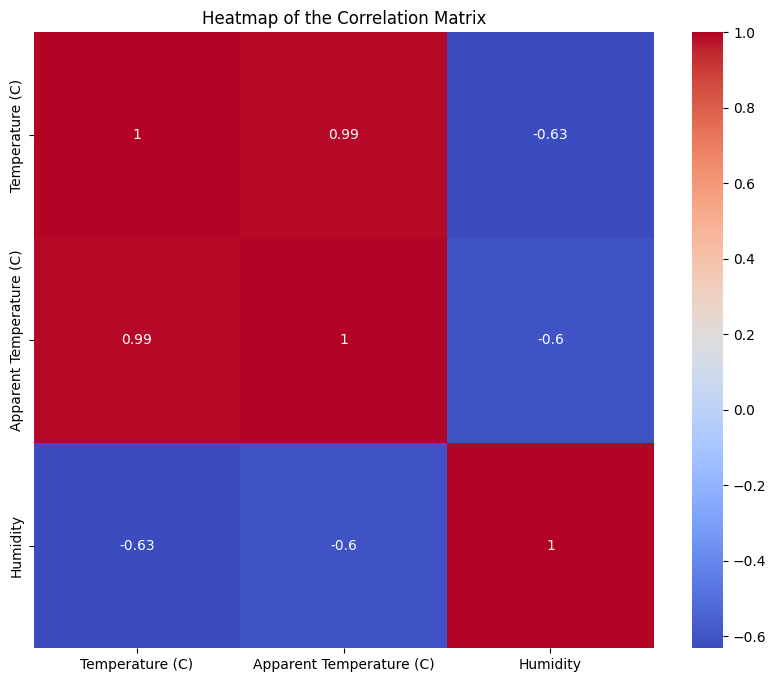

In [ ]:
relevant_data = data[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity']]

correlation_matrix = relevant_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap of the Correlation Matrix")
plt.show()


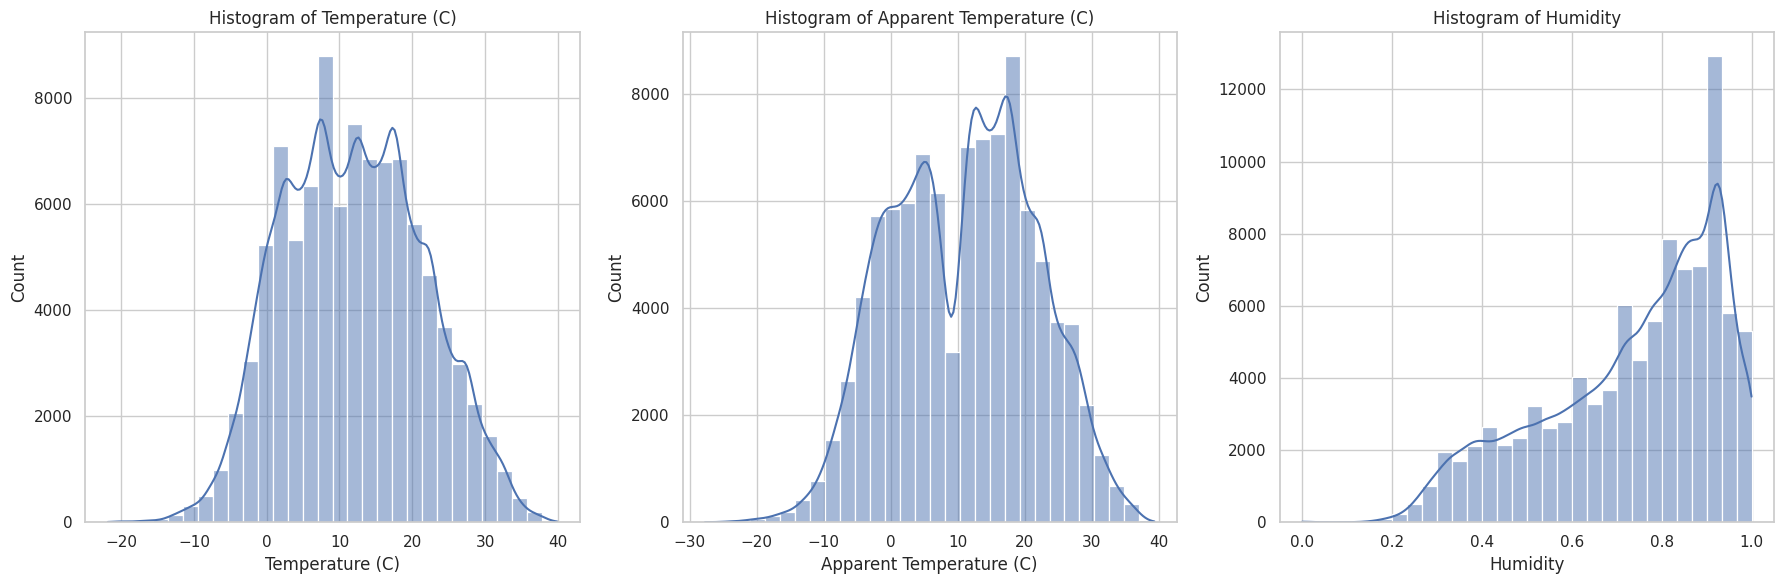

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(data['Temperature (C)'], ax=axes[0], bins=30, kde=True)
axes[0].set_title('Histogram of Temperature (C)')
ب
sns.histplot(data['Apparent Temperature (C)'], ax=axes[1], bins=30, kde=True)
axes[1].set_title('Histogram of Apparent Temperature (C)')

sns.histplot(data['Humidity'], ax=axes[2], bins=30, kde=True)
axes[2].set_title('Histogram of Humidity')

plt.tight_layout()
plt.show()


##Soal3_2

In [ ]:
data

Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1             9.355556                  7.227778      0.86            14.2646   
2             9.377778                  9.377778      0.89             3.9284   
3             8.288889                  5.944444      0.83            14.1036   
4             8.755556                  6.977778      0.83            11.0446   
...                ...                       ...       ...                ...   
96448        26.016667                 26.016667      0.43            10.9963   
96449        24.583333                 24.583333      0.48            10.0947   
96450        22.038889                 22.038889      0.56             8.9838   
96451        21.522222                 21.522222      0.60            10.5294   
96452        20.438889                 20.438889      0.61             5.8765   

       Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
0                       251.0          15.8263         0.0   
1                       259.0          15.8263         0.0   
2                       204.0          14.9569         0.0   
3                       269.0          15.8263         0.0   
4                       259.0          15.8263         0.0   
...                       ...              ...         ...   
96448                    31.0          16.1000         0.0   
96449                    20.0          15.5526         0.0   
96450                    30.0          16.1000         0.0   
96451                    20.0          16.1000         0.0   
96452                    39.0          15.5204         0.0   

       Pressure (millibars)                           Daily Summary  
0                   1015.13       Partly cloudy throughout the day.  
1                   1015.63       Partly cloudy throughout the day.  
2                   1015.94       Partly cloudy throughout the day.  
3                   1016.41       Partly cloudy throughout the day.  
4                   1016.51       Partly cloudy throughout the day.  
...                     ...                                     ...  
96448               1014.36  Partly cloudy starting in the morning.  
96449               1015.16  Partly cloudy starting in the morning.  
96450               1015.66  Partly cloudy starting in the morning.  
96451               1015.95  Partly cloudy starting in the morning.  
96452               1016.16  Partly cloudy starting in the morning.  

[96453 rows x 12 columns]

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/HW1/weatherHistory.csv')


X = data[['Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']]
y = data['Temperature (C)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

ls_model = LinearRegression()
ls_model.fit(X_train, y_train)
y_pred_ls = ls_model.predict(X_test)
mse_ls = mean_squared_error(y_test, y_pred_ls)


rls_model = Ridge(alpha=1)
rls_model.fit(X_train, y_train)
y_pred_rls = rls_model.predict(X_test)
mse_rls = mean_squared_error(y_test, y_pred_rls)

mse_ls, mse_rls


(53.34152161463771, 53.34156197445523)

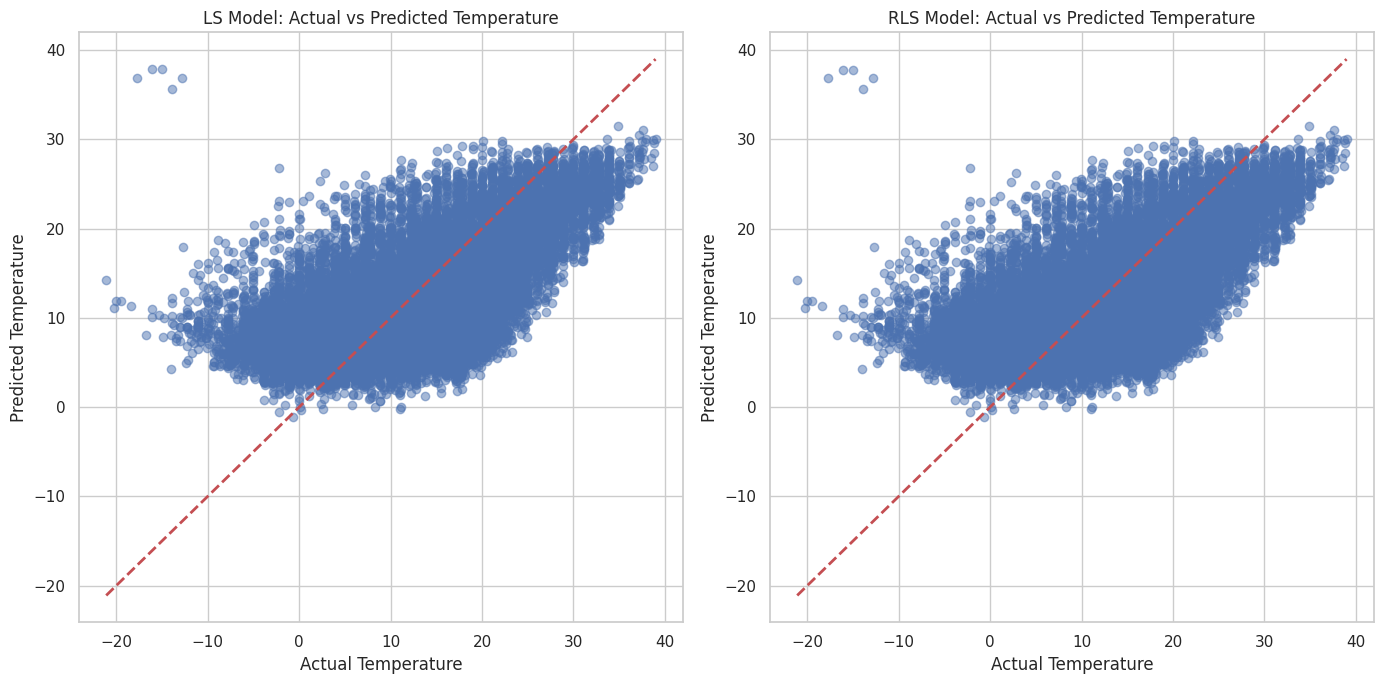

In [ ]:

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ls, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('LS Model: Actual vs Predicted Temperature')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rls, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('RLS Model: Actual vs Predicted Temperature')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')

plt.tight_layout()
plt.show()


##Soal3_3

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

data = pd.read_csv('/content/drive/MyDrive/HW1/weatherHistory.csv')

relevant_data = data[['Temperature (C)', 'Humidity']]

X = relevant_data[['Humidity']]
y = relevant_data['Temperature (C)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

X_train_wls = sm.add_constant(X_train)
X_test_wls = sm.add_constant(X_test)

weights = X_train['Humidity'].abs() / X_train['Humidity'].abs().max()

weights[weights < 1e-4] = 1e-4

wls_model = sm.WLS(y_train, X_train_wls, weights=weights)
wls_results = wls_model.fit()

y_pred_wls = wls_results.predict(X_test_wls)

wls_error = mean_squared_error(y_test, y_pred_wls)
print(wls_error)


55.26878713358144


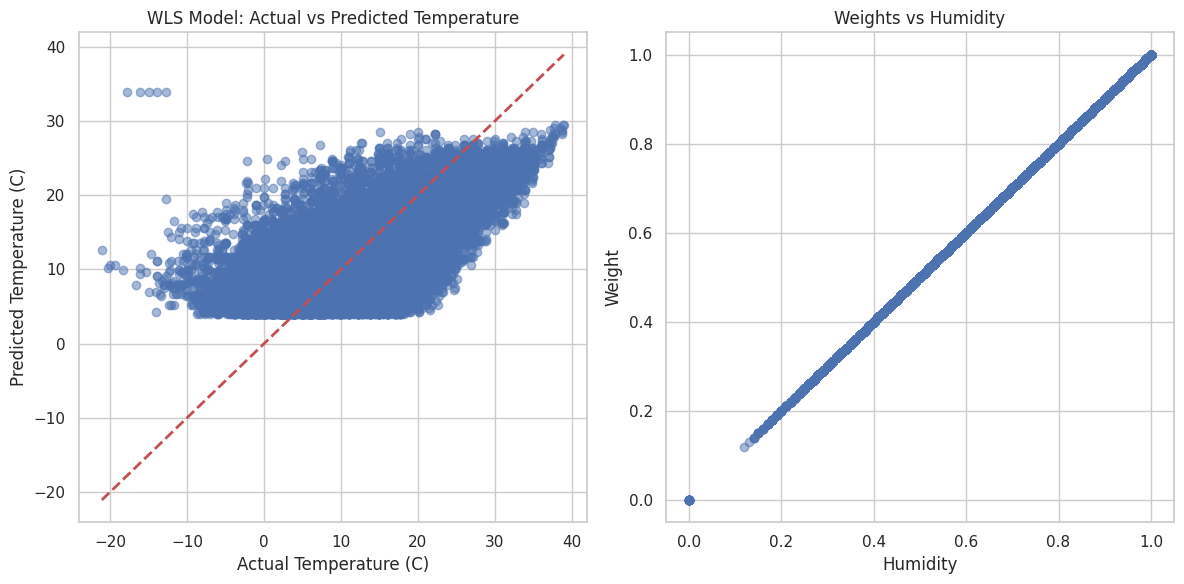

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted temperatures
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_wls, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('WLS Model: Actual vs Predicted Temperature')
plt.xlabel('Actual Temperature (C)')
plt.ylabel('Predicted Temperature (C)')

# Plot weights against Humidity
plt.subplot(1, 2, 2)
plt.scatter(X_train['Humidity'], weights, alpha=0.5)
plt.title('Weights vs Humidity')
plt.xlabel('Humidity')
plt.ylabel('Weight')

plt.tight_layout()
plt.show()
